In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [6]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

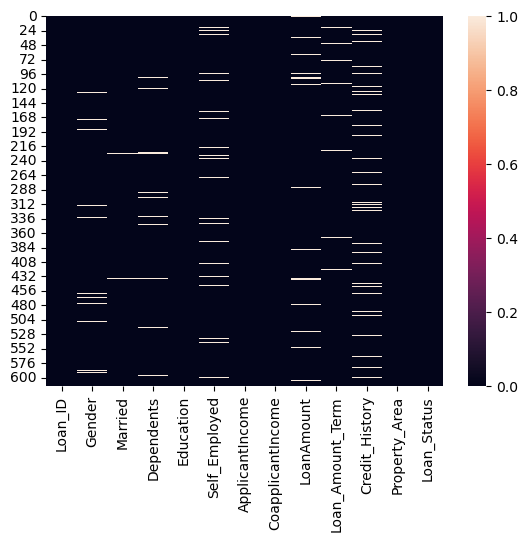

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.shape

(614, 13)

In [12]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer


In [17]:
imp=SimpleImputer(strategy='most_frequent')

In [18]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [19]:
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))

In [20]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [21]:
df.shape

(614, 13)

In [22]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
for i in df.isnull().columns:
    if df[i].dtypes=='object':
        df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [24]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [25]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
imp1=SimpleImputer(strategy='mean')
for i in df.columns:
    if df[i].dtypes=='float64':
        df[i]=imp1.fit_transform(df[i].values.reshape(-1,1))

In [27]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

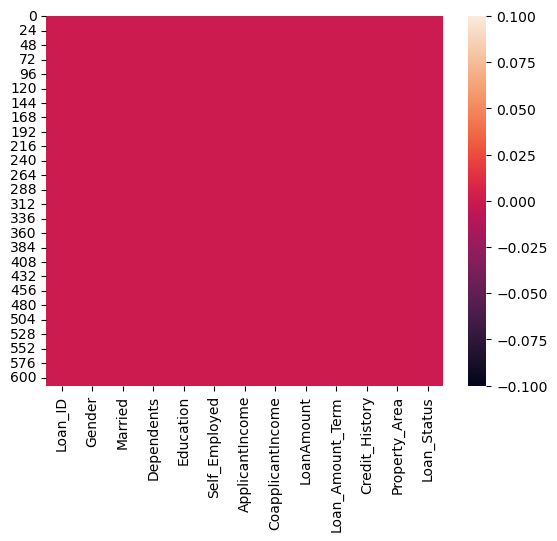

In [28]:
sns.heatmap(df.isnull())

In [29]:
#Now there are no null values in the data

In [30]:
#DataVisualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

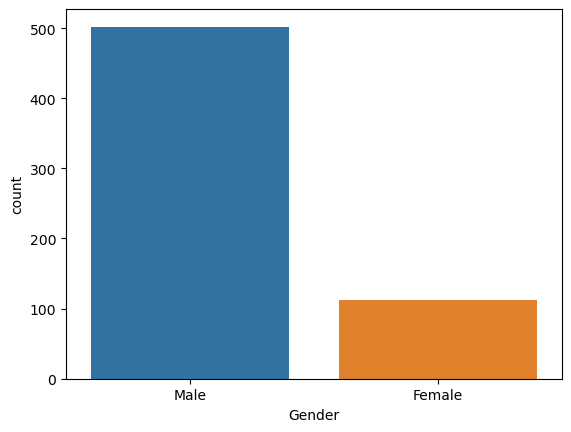

In [31]:
sns.countplot(df['Gender'])

In [32]:
#Majority of people who have applied for loan are men

<AxesSubplot:xlabel='Married', ylabel='count'>

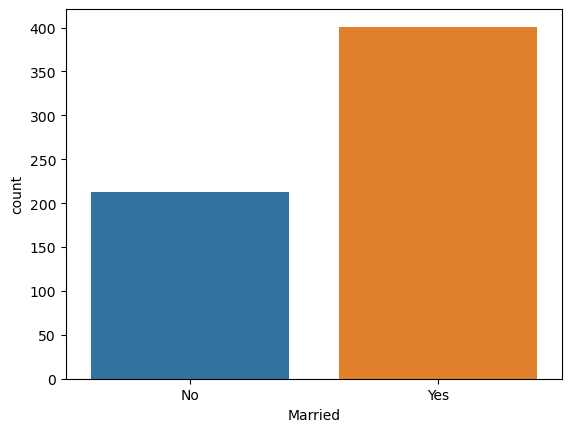

In [33]:
sns.countplot(df['Married'])

In [34]:
#Majority of Loan appliers are Married

<AxesSubplot:xlabel='Dependents', ylabel='count'>

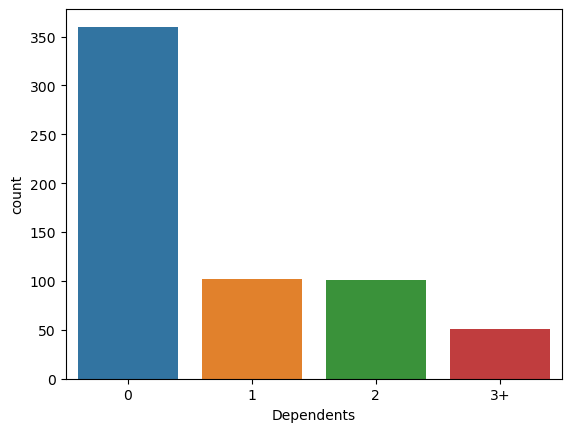

In [35]:
sns.countplot(df['Dependents'])

In [36]:
#Majority of applicants doesn't have any dependents

<AxesSubplot:xlabel='Education', ylabel='count'>

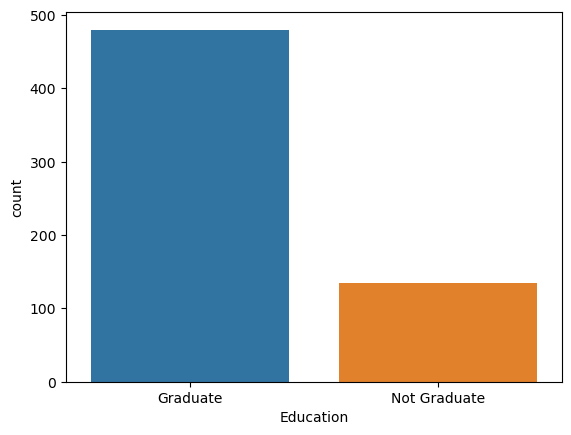

In [37]:
sns.countplot(df['Education'])

In [38]:
#Most of the applicants are graduate

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

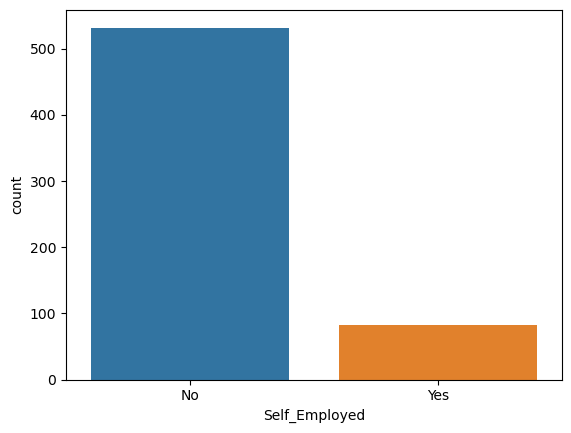

In [39]:
sns.countplot(df['Self_Employed'])

In [40]:
#Most of the applicants are not self employed

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

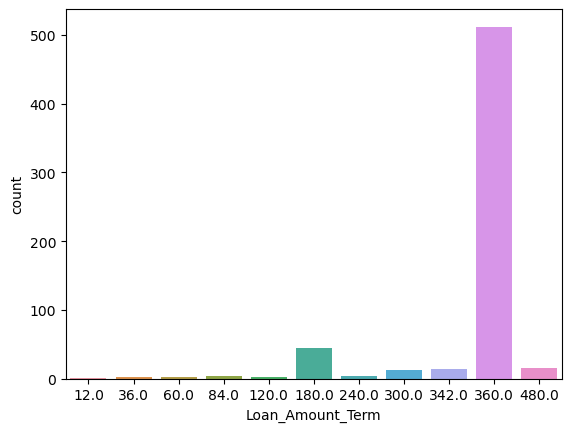

In [41]:
sns.countplot(df['Loan_Amount_Term'])

In [42]:
#Majority of the applicants have 360 months of tenure and least is 12 months tenure

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

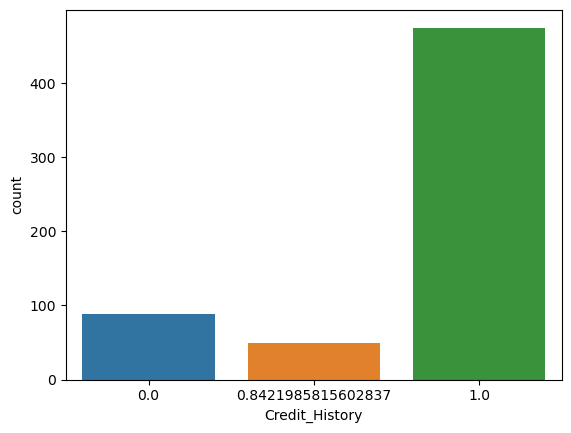

In [43]:
sns.countplot(df['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

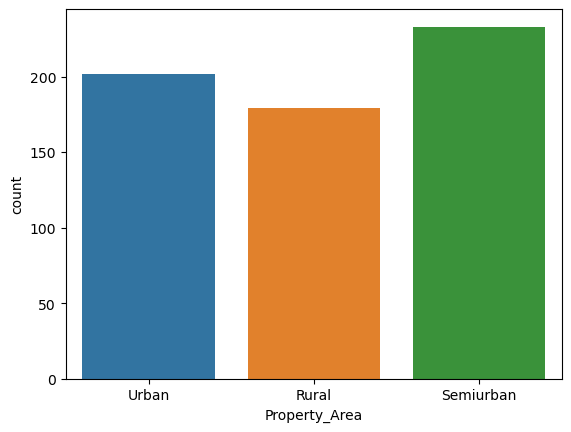

In [44]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

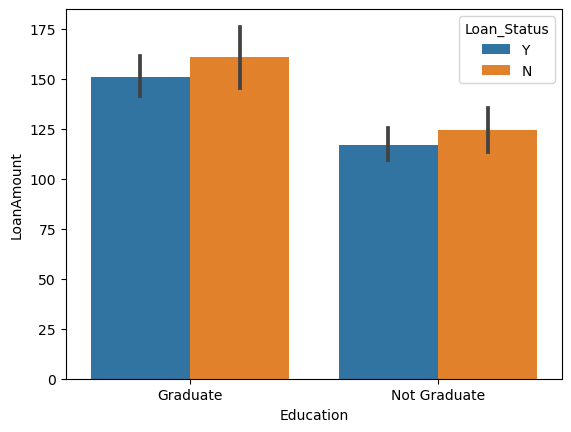

In [45]:
sns.barplot(x='Education',y='LoanAmount',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

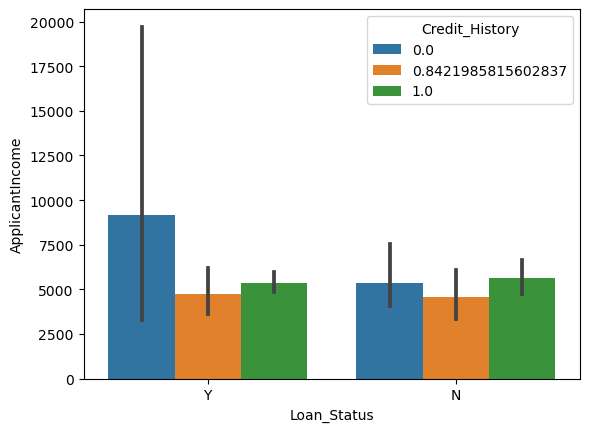

In [46]:
sns.barplot(x='Loan_Status',y='ApplicantIncome',hue='Credit_History',data=df)

In [47]:
#Applicants with credit history 0 are the applicants with highest income level

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

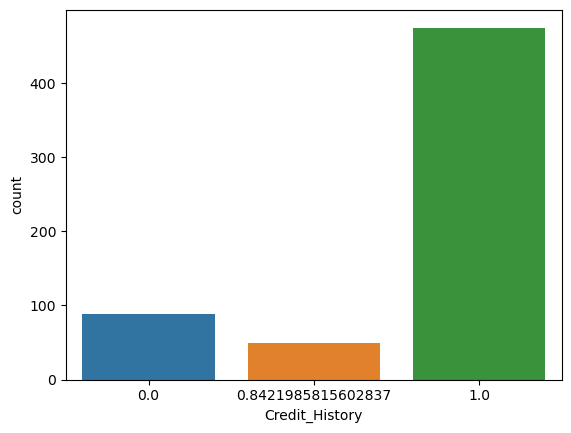

In [48]:
sns.countplot(df['Credit_History'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

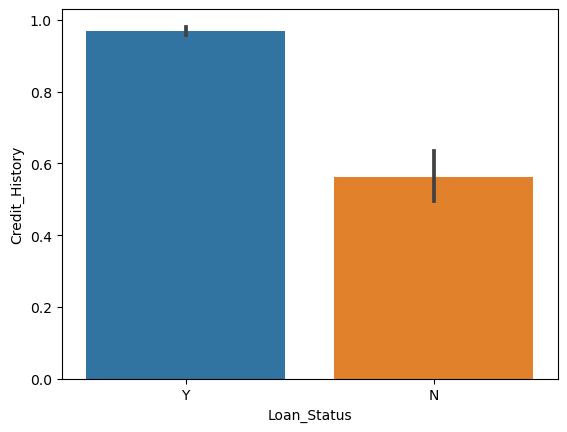

In [49]:
sns.barplot(x='Loan_Status',y='Credit_History',data=df)

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

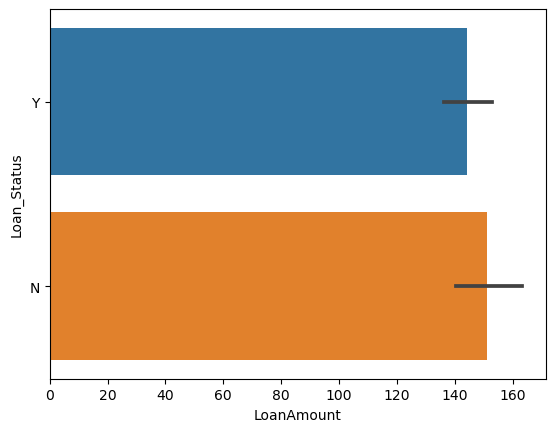

In [50]:
sns.barplot(x='LoanAmount',y='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

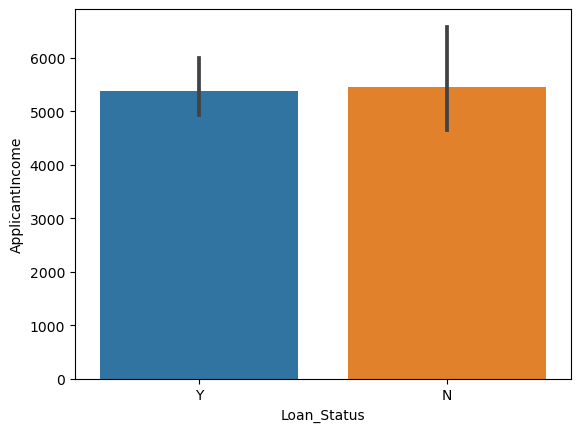

In [51]:
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>

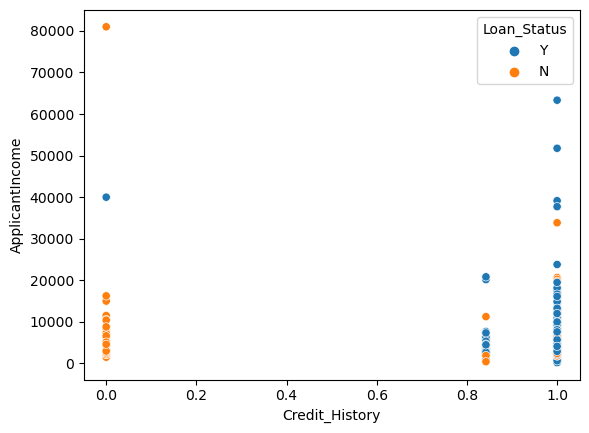

In [52]:
sns.scatterplot(x='Credit_History',y='ApplicantIncome',hue='Loan_Status',data=df)

In [53]:
#Applicants with credit history 1 have the highest no. of approval for loan application

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

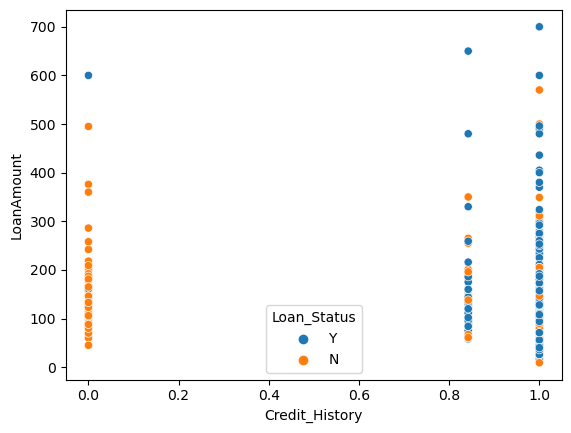

In [54]:
sns.scatterplot(x='Credit_History',y='LoanAmount',hue='Loan_Status',data=df)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

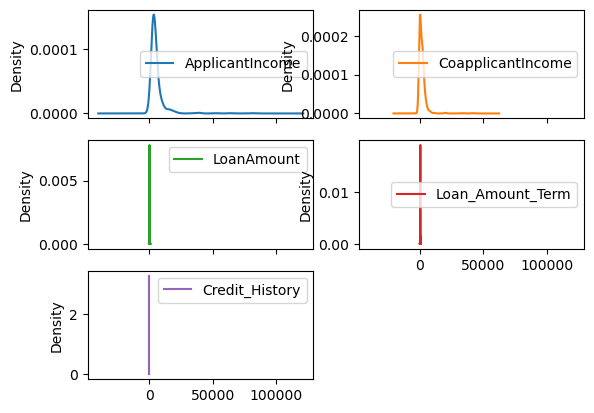

In [55]:
df.plot(kind='kde',subplots=True,layout=(3,2))

ApplicantIncome         AxesSubplot(0.125,0.653529;0.352273x0.226471)
CoapplicantIncome    AxesSubplot(0.547727,0.653529;0.352273x0.226471)
LoanAmount              AxesSubplot(0.125,0.381765;0.352273x0.226471)
Loan_Amount_Term     AxesSubplot(0.547727,0.381765;0.352273x0.226471)
Credit_History              AxesSubplot(0.125,0.11;0.352273x0.226471)
dtype: object

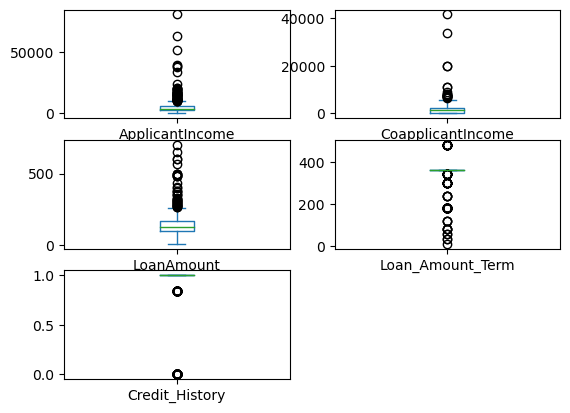

In [56]:
df.plot(kind='box',subplots=True,layout=(3,2))

In [57]:
#All the categorial columns are skewd and have outliers

In [58]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [59]:
from scipy.stats import boxcox

In [60]:
df['ApplicantIncome']=boxcox(df['ApplicantIncome'],0)

In [61]:
df.skew()

ApplicantIncome      0.479580
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [62]:
df['LoanAmount']=boxcox(df['LoanAmount'],0)

In [63]:
df.skew()

ApplicantIncome      0.479580
CoapplicantIncome    7.491531
LoanAmount          -0.223227
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [64]:
df['Credit_History']=np.cbrt(df['Credit_History'])

In [65]:
df.skew()

ApplicantIncome      0.479580
CoapplicantIncome    7.491531
LoanAmount          -0.223227
Loan_Amount_Term    -2.389680
Credit_History      -2.014285
dtype: float64

In [66]:
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])

In [67]:
df.skew()

ApplicantIncome      0.479580
CoapplicantIncome    0.196726
LoanAmount          -0.223227
Loan_Amount_Term    -2.389680
Credit_History      -2.014285
dtype: float64

In [68]:
#Credit History and Lona amount term are Categorical column, hence it is not required to remove skewness from them

In [69]:
from scipy.stats import zscore

In [70]:
z=np.abs(zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]))

In [71]:
z

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.516199,1.053225,0.250640
1,0.137879,0.561256,0.020226
2,0.519352,1.053225,1.355202
3,0.751478,0.820678,0.150299
4,0.555733,1.053225,0.174727
...,...,...,...
609,0.571934,1.053225,1.208025
610,0.032585,1.053225,2.364484
611,1.015830,0.178302,1.353011
612,0.918903,1.053225,0.743783


In [72]:
threshold=3
np.where(z>3)

(array([ 14,  94, 130, 133, 155, 155, 171, 171, 183, 185, 216, 333, 409,
        443, 468, 555, 561, 568, 581, 600, 600], dtype=int64),
 array([2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1],
       dtype=int64))

In [73]:
df_new=df[(z<3).all(axis=1)]
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,4.986426,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,11.467457,4.852030,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,13.310098,4.787492,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,7.972466,0.000000,4.262680,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,8.320205,0.000000,3.688879,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8.996157,6.214465,5.533389,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,8.933664,0.000000,5.231109,360.0,1.0,Urban,Y


In [74]:
df_new.shape

(596, 13)

In [75]:
df.shape

(614, 13)

In [76]:
loss=((df.shape[0]-df_new.shape[0])/df.shape[0])*100

In [77]:
loss

2.9315960912052117

In [78]:
#Encoding

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le=LabelEncoder()

In [81]:
for i in df_new.columns:
    if df_new[i].dtypes=='object':
        df_new[i]=le.fit_transform(df_new[i])

In [82]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,8.674026,0.000000,4.986426,360.0,1.0,2,1
1,1,1,1,1,0,0,8.430109,11.467457,4.852030,360.0,1.0,0,0
2,2,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,3,1,1,0,1,0,7.856707,13.310098,4.787492,360.0,1.0,2,1
4,4,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,591,0,0,0,0,0,7.972466,0.000000,4.262680,360.0,1.0,0,1
610,592,1,1,3,0,0,8.320205,0.000000,3.688879,180.0,1.0,0,1
611,593,1,1,1,0,0,8.996157,6.214465,5.533389,360.0,1.0,2,1
612,594,1,1,2,0,0,8.933664,0.000000,5.231109,360.0,1.0,2,1


In [83]:
df_new.cor=df_new.corr()
df_new.cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.006481,-0.007118,0.050116,0.043260,0.041234,0.035846,-0.035338,0.035727,-0.050035,-0.034881,-0.162539,0.025046
Gender,-0.006481,1.000000,0.370435,0.188031,0.051606,0.001734,0.055309,0.231988,0.162188,-0.075309,0.016199,-0.020626,0.012177
Married,-0.007118,0.370435,1.000000,0.337356,0.015663,0.000947,0.005752,0.306519,0.191595,-0.101449,0.015274,0.014515,0.086700
Dependents,0.050116,0.188031,0.337356,1.000000,0.061448,0.073637,0.117849,-0.008502,0.137613,-0.088999,-0.023474,-0.002545,0.012231
Education,0.043260,0.051606,0.015663,0.061448,1.000000,-0.003297,-0.180719,0.010986,-0.146188,-0.081516,-0.078887,-0.061351,-0.094231
Self_Employed,0.041234,0.001734,0.000947,0.073637,-0.003297,1.000000,0.194864,-0.070297,0.111856,-0.041963,-0.008468,-0.033750,-0.017799
ApplicantIncome,0.035846,0.055309,0.005752,0.117849,-0.180719,0.194864,1.000000,-0.333600,0.500529,-0.041791,0.052029,-0.043278,-0.017860
CoapplicantIncome,-0.035338,0.231988,0.306519,-0.008502,0.010986,-0.070297,-0.333600,1.000000,0.221129,-0.004919,-0.006787,-0.063365,0.053851
LoanAmount,0.035727,0.162188,0.191595,0.137613,-0.146188,0.111856,0.500529,0.221129,1.000000,0.062110,0.003764,-0.104189,-0.051295
Loan_Amount_Term,-0.050035,-0.075309,-0.101449,-0.088999,-0.081516,-0.041963,-0.041791,-0.004919,0.062110,1.000000,-0.000221,-0.068204,-0.010673


<AxesSubplot:>

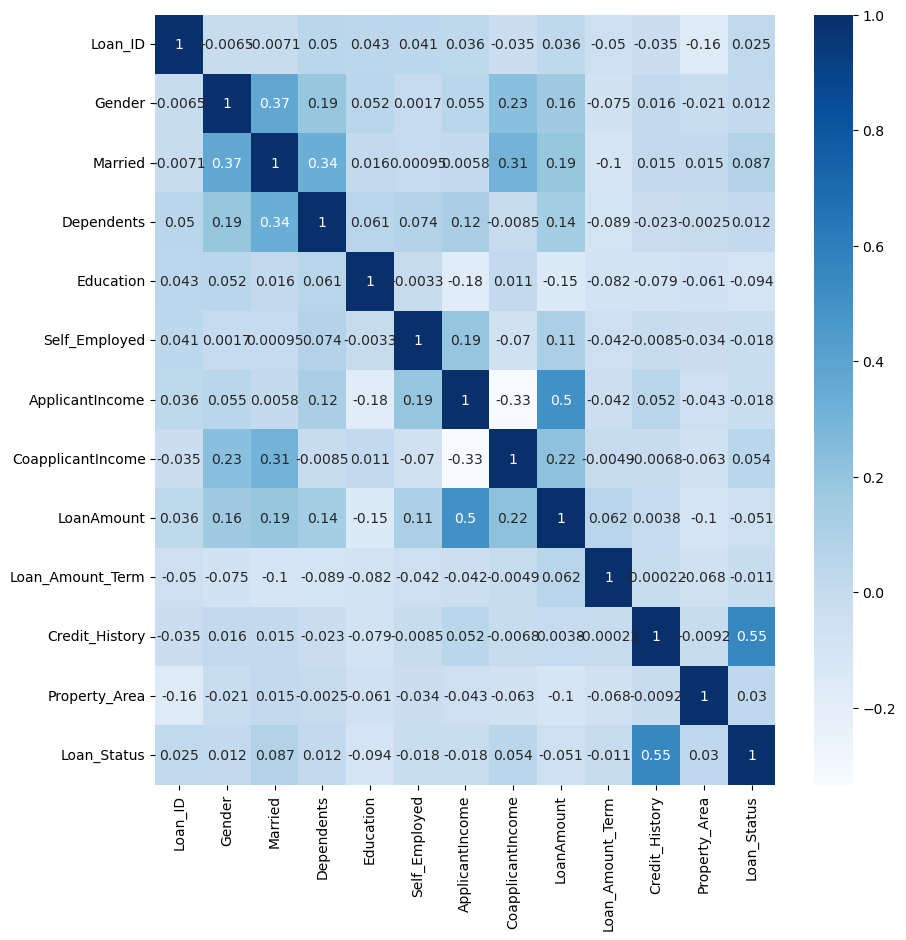

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.cor,annot=True,cmap='Blues')

In [85]:
#MultiCollinearity

In [86]:
#Spearating Feature columns and Target columns

In [87]:
x=df_new.drop('Loan_Status',axis=1)

In [88]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,8.674026,0.000000,4.986426,360.0,1.0,2
1,1,1,1,1,0,0,8.430109,11.467457,4.852030,360.0,1.0,0
2,2,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2
3,3,1,1,0,1,0,7.856707,13.310098,4.787492,360.0,1.0,2
4,4,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,591,0,0,0,0,0,7.972466,0.000000,4.262680,360.0,1.0,0
610,592,1,1,3,0,0,8.320205,0.000000,3.688879,180.0,1.0,0
611,593,1,1,1,0,0,8.996157,6.214465,5.533389,360.0,1.0,2
612,594,1,1,2,0,0,8.933664,0.000000,5.231109,360.0,1.0,2


In [89]:
y=df_new['Loan_Status']

In [90]:
x.shape

(596, 12)

In [91]:
y.shape

(596,)

In [92]:
#Standard Scaler

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler=StandardScaler()

In [95]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
vif=pd.DataFrame()
vif['Values']=[variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,Values,Features
0,1.039550,Loan_ID
1,1.210992,Gender
2,1.387135,Married
3,1.183192,Dependents
4,1.073109,Education
5,1.046822,Self_Employed
6,1.957216,ApplicantIncome
7,1.629382,CoapplicantIncome
8,1.788098,LoanAmount
9,1.050542,Loan_Amount_Term


In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
SM=SMOTE()

In [100]:
x1,y1=SM.fit_resample(x,y)

In [101]:
x1.shape

(820, 12)

In [102]:
y1.value_counts()

1    410
0    410
Name: Loan_Status, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.svm import SVC

In [105]:
MaxAcc=0
MaxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    MaxAcc=acc
    MaxRS=i
print('MaxAcc=',acc,'MaxRS=',MaxRS)

MaxAcc= 0.6991869918699187 MaxRS= 99


In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=MaxRS)

In [107]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(classification_report(y_test,predLR))
print(confusion_matrix(y_test,predLR))

0.7877094972067039
              precision    recall  f1-score   support

           0       0.94      0.45      0.60        65
           1       0.76      0.98      0.85       114

    accuracy                           0.79       179
   macro avg       0.85      0.71      0.73       179
weighted avg       0.82      0.79      0.76       179

[[ 29  36]
 [  2 112]]


In [108]:
RFR=RandomForestClassifier()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
print(accuracy_score(y_test,predRFR))
print(confusion_matrix(y_test,predRFR))
print(classification_report(y_test,predRFR))

0.776536312849162
[[ 32  33]
 [  7 107]]
              precision    recall  f1-score   support

           0       0.82      0.49      0.62        65
           1       0.76      0.94      0.84       114

    accuracy                           0.78       179
   macro avg       0.79      0.72      0.73       179
weighted avg       0.78      0.78      0.76       179



In [109]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC=ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.8044692737430168
[[ 35  30]
 [  5 109]]
              precision    recall  f1-score   support

           0       0.88      0.54      0.67        65
           1       0.78      0.96      0.86       114

    accuracy                           0.80       179
   macro avg       0.83      0.75      0.76       179
weighted avg       0.82      0.80      0.79       179



In [110]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC=GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))

0.7653631284916201
[[ 30  35]
 [  7 107]]
              precision    recall  f1-score   support

           0       0.81      0.46      0.59        65
           1       0.75      0.94      0.84       114

    accuracy                           0.77       179
   macro avg       0.78      0.70      0.71       179
weighted avg       0.77      0.77      0.75       179



In [111]:
ABC=AdaBoostClassifier()
ABC.fit(x_test,y_test)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.9106145251396648
[[ 52  13]
 [  3 111]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        65
           1       0.90      0.97      0.93       114

    accuracy                           0.91       179
   macro avg       0.92      0.89      0.90       179
weighted avg       0.91      0.91      0.91       179



In [112]:
BC=BaggingClassifier()
BC.fit(x_test,y_test)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9888268156424581
[[ 65   0]
 [  2 112]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        65
           1       1.00      0.98      0.99       114

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



In [113]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7877094972067039
[[ 29  36]
 [  2 112]]
              precision    recall  f1-score   support

           0       0.94      0.45      0.60        65
           1       0.76      0.98      0.85       114

    accuracy                           0.79       179
   macro avg       0.85      0.71      0.73       179
weighted avg       0.82      0.79      0.76       179



In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
cv=5
cv_score=cross_val_score(LR,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Differnece between cv score and accuracy score:",(accuracy_score(y_test,predLR))-(cv_score.mean()))

[0.8        0.78991597 0.78991597 0.85714286 0.82352941]
0.8121008403361344
Differnece between cv score and accuracy score: -0.024391343129430476


In [116]:
cv=5
cv_score=cross_val_score(RFR,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predRFR)-(cv_score.mean())))

[0.775      0.76470588 0.78151261 0.84033613 0.77310924]
0.7869327731092437
Difference between cv score and accuracy score: -0.010396460260081675


In [117]:
cv=5
cv_score=cross_val_score(ETC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predETC)-(cv_score.mean())))

[0.76666667 0.77310924 0.77310924 0.79831933 0.76470588]
0.7751820728291318
Difference between cv score and accuracy score: 0.029287200913885036


In [118]:
cv=5
cv_score=cross_val_score(GBC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predGBC)-(cv_score.mean())))

[0.55       0.67226891 0.78151261 0.84033613 0.76470588]
0.721764705882353
Difference between cv score and accuracy score: 0.04359842260926716


In [119]:
cv=5
cv_score=cross_val_score(ABC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predABC)-(cv_score.mean())))

[0.34166667 0.68907563 0.75630252 0.83193277 0.67226891]
0.658249299719888
Difference between cv score and accuracy score: 0.2523652254197768


In [120]:
cv=5
cv_score=cross_val_score(BC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predBC)-(cv_score.mean())))

[0.66666667 0.68067227 0.78151261 0.79831933 0.72268908]
0.7299719887955183
Difference between cv score and accuracy score: 0.25885482684693983


In [121]:
cv=5
cv_score=cross_val_score(svc,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between cv score and accuracy score:",(accuracy_score(y_test,predsvc)-(cv_score.mean())))

[0.8        0.78151261 0.78151261 0.86554622 0.82352941]
0.8104201680672268
Difference between cv score and accuracy score: -0.02271067086052292


In [122]:
#We are selecting svc as our best model because accuracy score is high and Difference between cv score and accuracy score is least

In [123]:
from sklearn.model_selection import GridSearchCV

In [143]:
parameters={'degree':[1,10,23,14],
           'C':[3],
           'kernel':['linear','poly','rbf'],
           'gamma':['scale','auto'],
           'random_state':[2,10,34,21]}

In [144]:
gscv=GridSearchCV(svc,parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [3], 'degree': [1, 10, 23, 14],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'random_state': [2, 10, 34, 21]})

In [145]:
gscv.best_params_

{'C': 3, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear', 'random_state': 2}

In [151]:
Model=SVC(C=3,degree=1,gamma='scale',kernel='linear',random_state=2)

In [152]:
Model.fit(x_train,y_train)
predM=Model.predict(x_test)
print(accuracy_score(y_test,predM))
print(confusion_matrix(y_test,predM))
print(classification_report(y_test,predM))

0.7877094972067039
[[ 29  36]
 [  2 112]]
              precision    recall  f1-score   support

           0       0.94      0.45      0.60        65
           1       0.76      0.98      0.85       114

    accuracy                           0.79       179
   macro avg       0.85      0.71      0.73       179
weighted avg       0.82      0.79      0.76       179



In [153]:
import joblib

In [154]:
joblib.dump(Model,'Loan_Status')

['Loan_Status']

In [155]:
model=joblib.load('Loan_Status')

In [156]:
predictions=Model.predict(x_test)
predictions

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0])

In [157]:
conclusion=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
Predicted,0,1,1,1,1,0,1,1,1,1,...,1,1,0,1,1,0,1,1,1,0
Original,0,1,1,1,1,0,1,1,1,0,...,1,1,0,1,1,0,0,1,0,0
